In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:08<00:00, 235MB/s]
100% 1.06G/1.06G [00:08<00:00, 134MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import regularizers

In [5]:
# Using Generators: Dividing large datasets into batches
train_df = keras.utils.image_dataset_from_directory(
      directory = '/content/train',
      labels = 'inferred',
      batch_size = 32,
      image_size = (256,256),
      label_mode = 'int'
 )

test_df = keras.utils.image_dataset_from_directory(
      directory = '/content/test',
      labels = 'inferred',
      batch_size = 32,
      image_size = (256,256),
      label_mode = 'int'
 )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Data Preprocessing
# scaling dataset images
def scale(image,label):
  image = tf.cast(image/255.0,tf.float32)
  return image,label

train_df = train_df.map(scale)
test_df = test_df.map(scale)

In [7]:
# CNN model
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3),padding = 'valid',activation = 'relu', input_shape=(256,256,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides = 2, padding = 'valid'),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation = 'relu',padding = 'valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides = 2, padding = 'valid'),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3),padding = 'valid',activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides = 2, padding = 'valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')

])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
graph_data = cnn_model.fit(train_df,epochs=15,validation_data=test_df)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.5362 - loss: 4.6864 - val_accuracy: 0.6118 - val_loss: 1.0075
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 78ms/step - accuracy: 0.5921 - loss: 0.9654 - val_accuracy: 0.5940 - val_loss: 0.9247
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 81ms/step - accuracy: 0.6678 - loss: 0.6760 - val_accuracy: 0.6720 - val_loss: 0.6774
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7194 - loss: 0.6011 - val_accuracy: 0.7526 - val_loss: 0.5421
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.7488 - loss: 0.5766 - val_accuracy: 0.7354 - val_loss: 0.6112
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7712 - loss: 0.5451 - val_accuracy: 0.7260 - val_loss: 0.5890
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7919 - loss: 0.4901 - val_accuracy: 0.7712 - val_loss: 0.5452
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.8143 - loss: 0.4611 - 

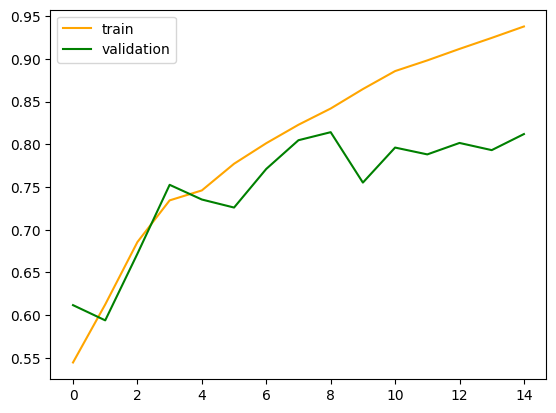

In [11]:
import matplotlib.pyplot as plt
plt.plot(graph_data.history['accuracy'],color='orange',label='train')
plt.plot(graph_data.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()

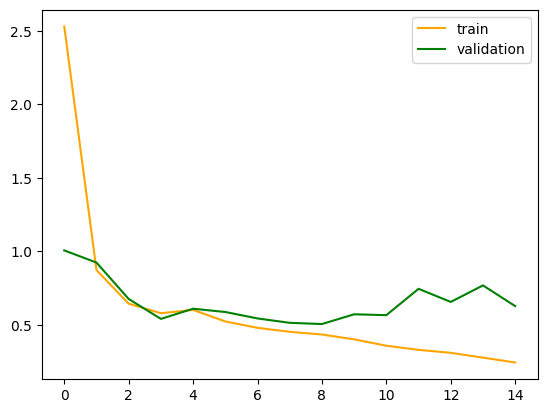

In [12]:
import matplotlib.pyplot as plt
plt.plot(graph_data.history['loss'],color='orange',label='train')
plt.plot(graph_data.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [13]:
import cv2 as cv

In [29]:
test_img = cv.imread('/content/testdog.jpg')

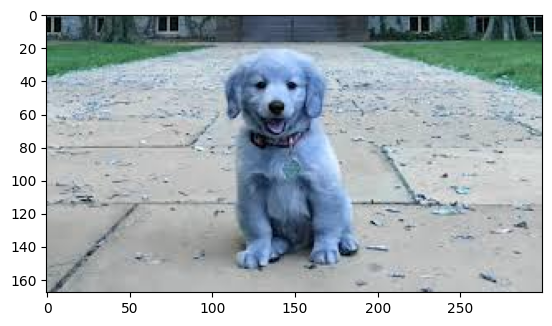

In [30]:
plt.imshow(test_img)

In [31]:
test_img.shape

(168, 300, 3)

In [32]:
test_img = cv.resize(test_img,(256,256))

In [33]:
test_input = test_img.reshape((1,256,256,3))

In [34]:
cnn_model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)

In [35]:
import numpy as np
prediction = cnn_model.predict(test_input)
if np.array_equal(prediction, np.array([[0.]], dtype=np.float32)):
    print("This is a cat.")
elif np.array_equal(prediction, np.array([[1.]], dtype=np.float32)):
    print("This is a dog.")
else:
    print("Unknown prediction.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
This is a dog.
